In [31]:
# Gerekli Kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pickle
from sklearn.ensemble import RandomForestClassifier


In [32]:
#Veriyi yükleme
df = pd.read_csv('train_odev.csv')

# İlk birkaç satırı inceleme
print(df.head())

# Veri seti hakkında genel bilgiler edinme
print(df.info())
print(df.describe())

   battery  blue  speed  dual_sim  fcamera  g4  memory  pdepth  pweight  \
0      842     0    2.2         0        1   0       7     0.6      188   
1     1021     1    0.5         1        0   1      53     0.7      136   
2      563     1    0.5         1        2   1      41     0.9      145   
3      615     1    2.5         0        0   0      10     0.8      131   
4     1821     1    1.2         0       13   1      44     0.6      141   

   cores  pcamera  px_height  px_width  sheight  swidth  talk_time  g3  \
0      2        2         20       756        9       7         19   0   
1      3        6        905      1988       17       3          7   1   
2      5        6       1263      1716       11       2          9   1   
3      6        9       1216      1786       16       8         11   1   
4      2       14       1208      1212        8       2         15   1   

   touch_screen  wifi  price_range  
0             0     1            1  
1             1     0         

In [33]:
# Veri setinin boyutları ve nitelik türleri
print("Veri Setinin Genel Özellikleri:")
print(f"Kayıt Sayısı (Örnek Sayısı): {df.shape[0]}")
print(f"Nitelik Sayısı (Kolon Sayısı): {df.shape[1]}")
print("\nNiteliklerin Türleri:")
print(df.dtypes)


Veri Setinin Genel Özellikleri:
Kayıt Sayısı (Örnek Sayısı): 1200
Nitelik Sayısı (Kolon Sayısı): 20

Niteliklerin Türleri:
battery           int64
blue              int64
speed           float64
dual_sim          int64
fcamera           int64
g4                int64
memory            int64
pdepth          float64
pweight           int64
cores             int64
pcamera           int64
px_height         int64
px_width          int64
sheight           int64
swidth            int64
talk_time         int64
g3                int64
touch_screen      int64
wifi              int64
price_range       int64
dtype: object


In [34]:
# Merkezi eğilim ölçümleri: Ortalama, Medyan ve Mod
print("\nMerkezi Eğilim Ölçümleri:")
print("Ortalama (Mean):")
print(df.mean())
print("\nMedyan (Median):")
print(df.median())
print("\nMod (Mode):")
print(df.mode().iloc[0])  # İlk mod değerini alıyoruz.



Merkezi Eğilim Ölçümleri:
Ortalama (Mean):
battery         1239.906667
blue               0.507500
speed              1.492500
dual_sim           0.508333
fcamera            4.365833
g4                 0.527500
memory            31.765000
pdepth             0.501167
pweight          140.223333
cores              4.489167
pcamera           10.031667
px_height        666.865000
px_width        1265.271667
sheight           12.380000
swidth             5.790000
talk_time         11.325833
g3                 0.758333
touch_screen       0.505833
wifi               0.507500
price_range        1.500000
dtype: float64

Medyan (Median):
battery         1231.5
blue               1.0
speed              1.4
dual_sim           1.0
fcamera            3.0
g4                 1.0
memory            31.0
pdepth             0.5
pweight          141.0
cores              4.0
pcamera           10.0
px_height        594.0
px_width        1260.0
sheight           13.0
swidth             5.0
talk_time         

In [35]:
# Beş Sayı Özeti: Minimum, Q1, Medyan, Q3, Maksimum
print("\nBeş Sayı Özeti:")
print(df.describe())



Beş Sayı Özeti:
           battery         blue        speed     dual_sim      fcamera  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000   
mean   1239.906667     0.507500     1.492500     0.508333     4.365833   
std     442.722035     0.500152     0.821212     0.500139     4.355204   
min     501.000000     0.000000     0.500000     0.000000     0.000000   
25%     845.500000     0.000000     0.600000     0.000000     1.000000   
50%    1231.500000     1.000000     1.400000     1.000000     3.000000   
75%    1619.250000     1.000000     2.200000     1.000000     7.000000   
max    1998.000000     1.000000     3.000000     1.000000    19.000000   

                g4       memory       pdepth      pweight        cores  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000   
mean      0.527500    31.765000     0.501167   140.223333     4.489167   
std       0.499451    17.920307     0.285861    35.596878     2.277617   
min       0.000000  

In [36]:
# Standart Sapma ve Varyans Hesaplama
std_devs = df.std()  # Her bir özelliğin standart sapmasını hesaplar
variances = df.var()  # Her bir özelliğin varyansını hesaplar

# Sonuçları yazdırma
print("Standart Sapmalar:")
print(std_devs)

print("\nVaryanslar:")
print(variances)

Standart Sapmalar:
battery         442.722035
blue              0.500152
speed             0.821212
dual_sim          0.500139
fcamera           4.355204
g4                0.499451
memory           17.920307
pdepth            0.285861
pweight          35.596878
cores             2.277617
pcamera           6.010194
px_height       451.662648
px_width        425.400393
sheight           4.223798
swidth            4.409320
talk_time         5.516342
g3                0.428272
touch_screen      0.500174
wifi              0.500152
price_range       1.118500
dtype: float64

Varyanslar:
battery         196002.800289
blue                 0.250152
speed                0.674389
dual_sim             0.250139
fcamera             18.967806
g4                   0.249452
memory             321.137389
pdepth               0.081717
pweight           1267.137737
cores                5.187539
pcamera             36.122433
px_height       203999.147731
px_width        180965.494109
sheight             17.

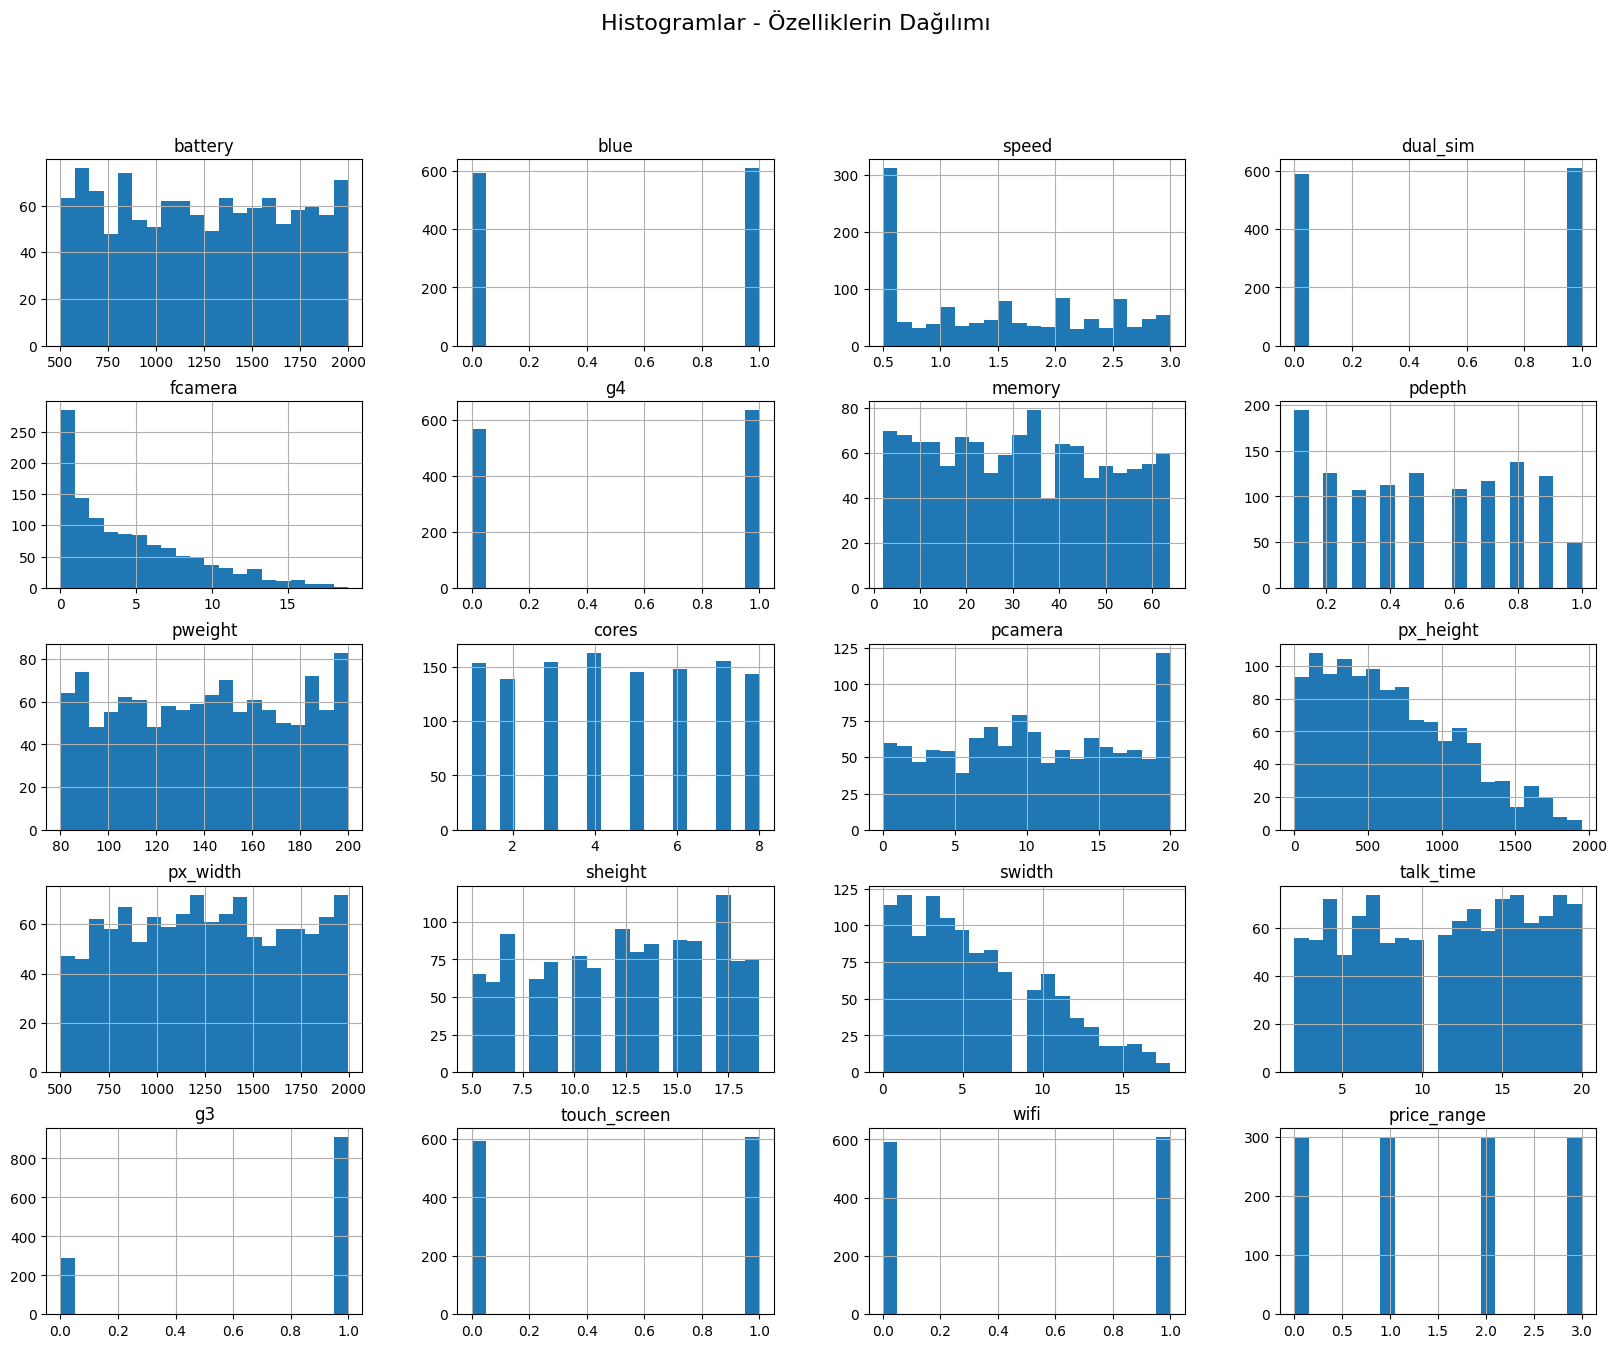

In [37]:
# Histogram: Özelliklerin dağılımını görselleştirme
df.hist(bins=20, figsize=(20, 15))
plt.suptitle("Histogramlar - Özelliklerin Dağılımı", fontsize=16)
plt.show()

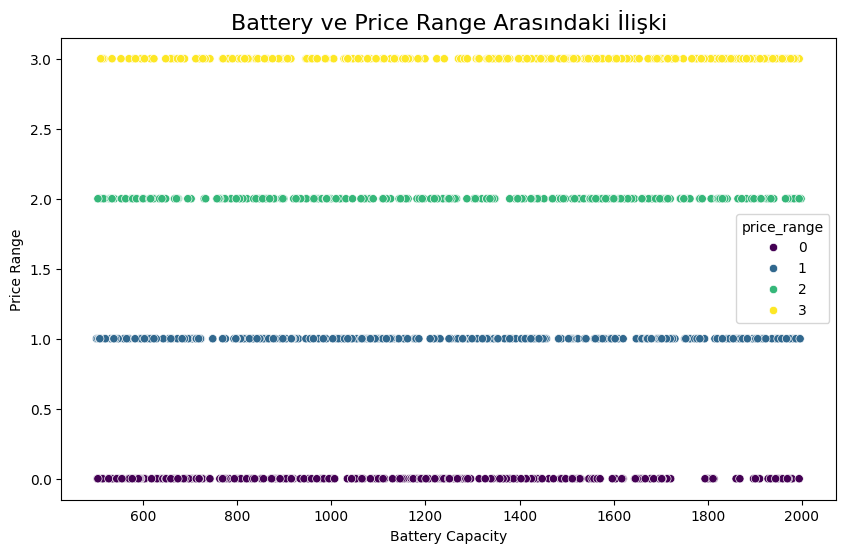

In [38]:
# Dağılım Grafiği (Scatter Plot): Özelliklerin price_range ile ilişkisi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='battery', y='price_range', data=df, hue='price_range', palette='viridis')
plt.title("Battery ve Price Range Arasındaki İlişki", fontsize=16)
plt.xlabel("Battery Capacity")
plt.ylabel("Price Range")
plt.show()

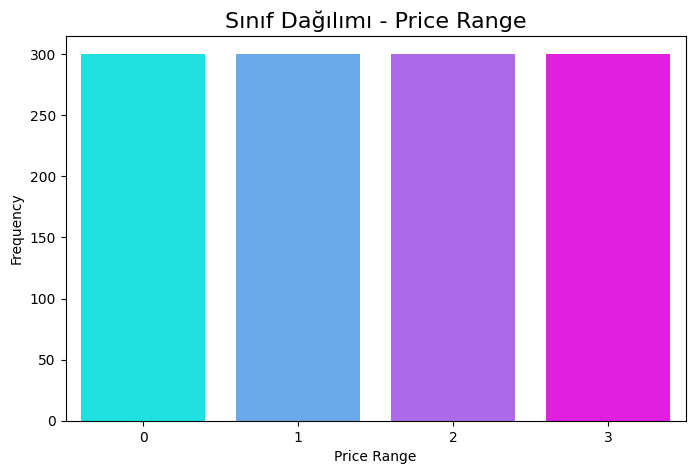

In [39]:
# Sınıf Dağılımı: price_range'in dağılımını analiz etme
plt.figure(figsize=(8, 5))
sns.countplot(x='price_range', data=df, hue='price_range', palette="cool", legend=False)
plt.title("Sınıf Dağılımı - Price Range", fontsize=16)
plt.xlabel("Price Range")
plt.ylabel("Frequency")
plt.show()

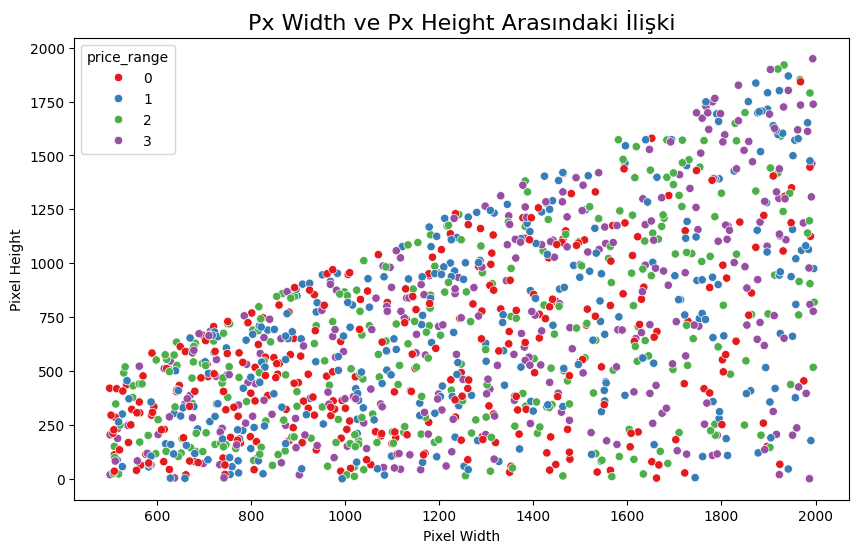

In [40]:
#px_width ile px_height arasındaki ilişkiyi gösterme
plt.figure(figsize=(10, 6))
sns.scatterplot(x='px_width', y='px_height', data=df, hue='price_range', palette='Set1')
plt.title("Px Width ve Px Height Arasındaki İlişki", fontsize=16)
plt.xlabel("Pixel Width")
plt.ylabel("Pixel Height")
plt.show()

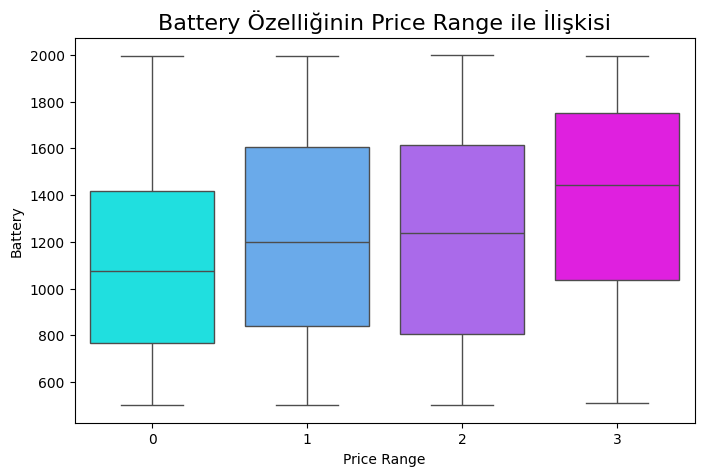

In [41]:
#'battery' özelliği için
plt.figure(figsize=(8, 5))
sns.boxplot(x='price_range', y='battery', data=df, hue='price_range', palette="cool", legend=False) # Değiştirilen satır
plt.title("Battery Özelliğinin Price Range ile İlişkisi", fontsize=16)
plt.xlabel("Price Range")
plt.ylabel("Battery")
plt.show()


In [42]:
# Eksik verileri kontrol etme
print("Eksik veri var mı?")
print(df.isnull().sum())

# Eksik verileri doldurma
# Sayısal sütunlar için ortalama ile doldurulması
df.fillna(df.mean(), inplace=True)

# Alternatif olarak, kategorik sütunlar için mod ile doldurulması
# df['categorical_column'].fillna(df['categorical_column'].mode()[0], inplace=True)

Eksik veri var mı?
battery         0
blue            0
speed           0
dual_sim        0
fcamera         0
g4              0
memory          0
pdepth          0
pweight         0
cores           0
pcamera         0
px_height       0
px_width        0
sheight         0
swidth          0
talk_time       0
g3              0
touch_screen    0
wifi            0
price_range     0
dtype: int64


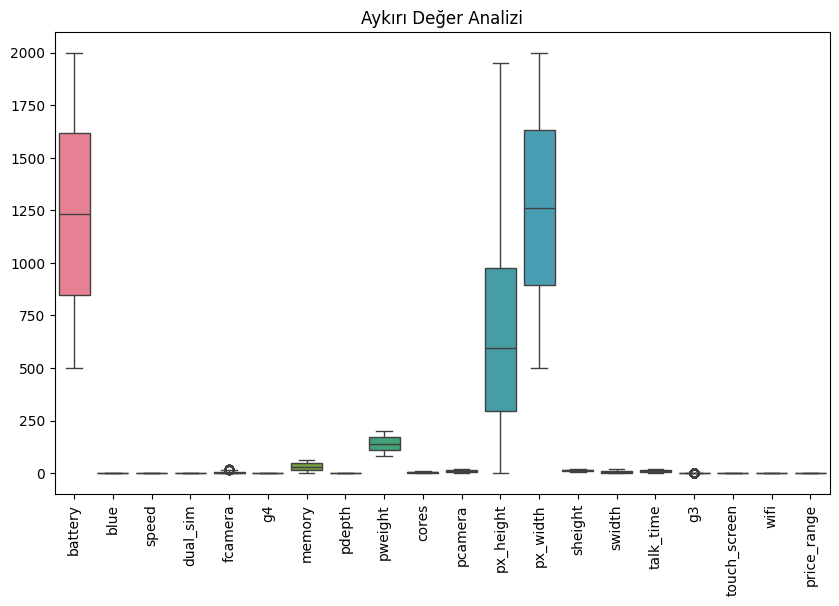

In [43]:
# Aykırı değer analizi için bir kutu grafiği
data = pd.read_csv('train_odev.csv')
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Aykırı Değer Analizi')
plt.show()

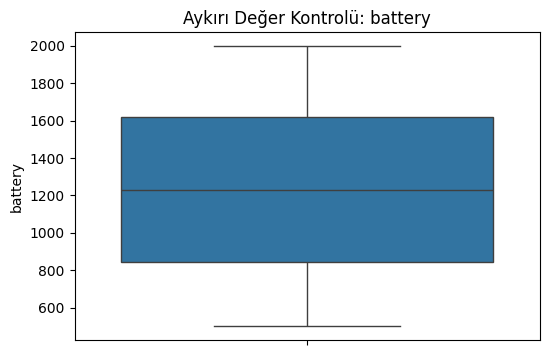

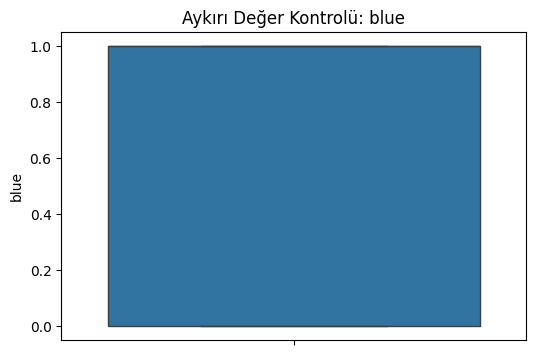

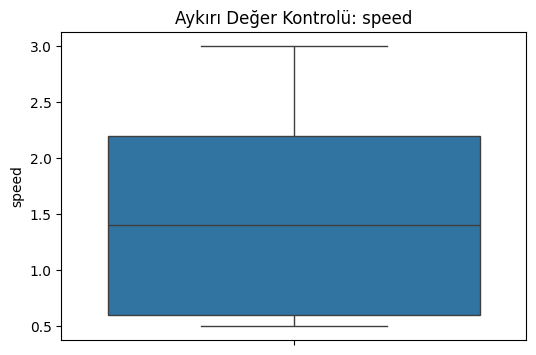

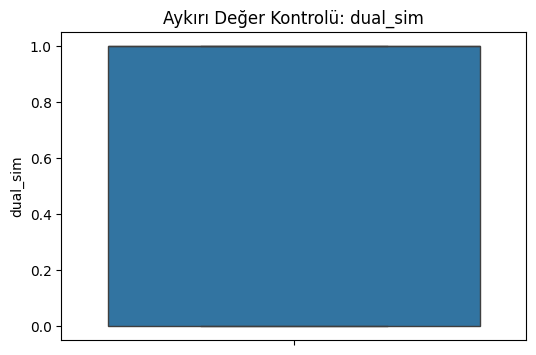

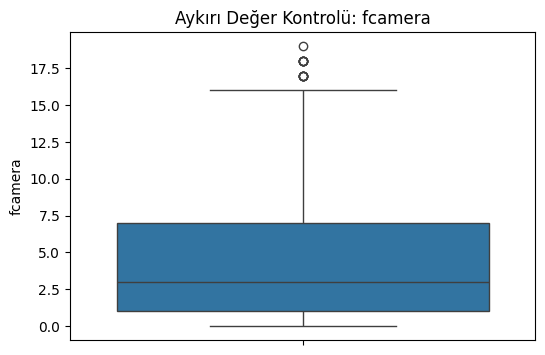

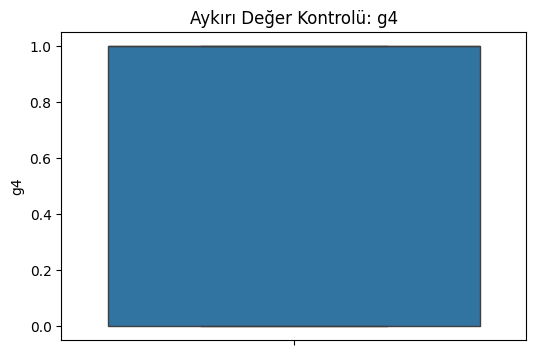

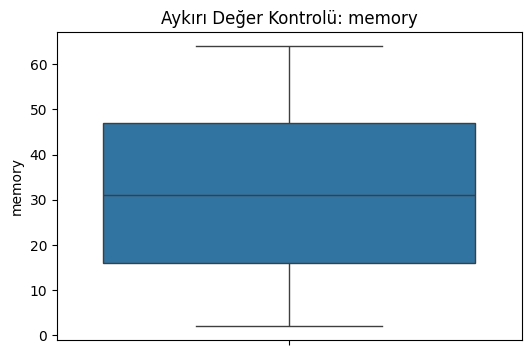

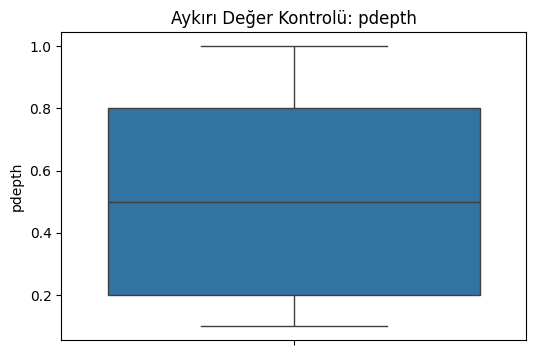

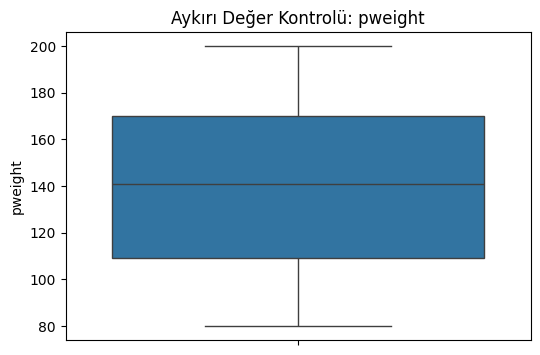

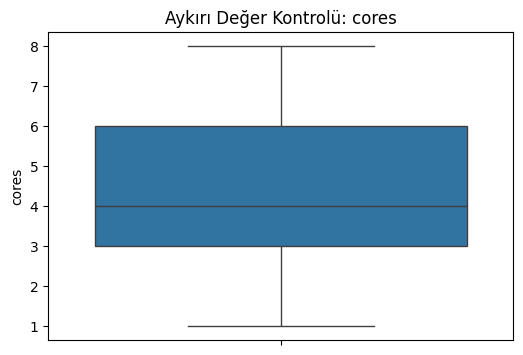

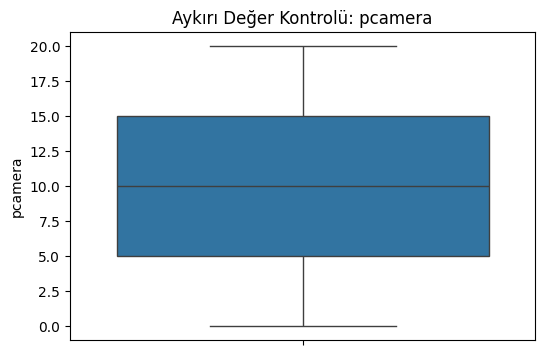

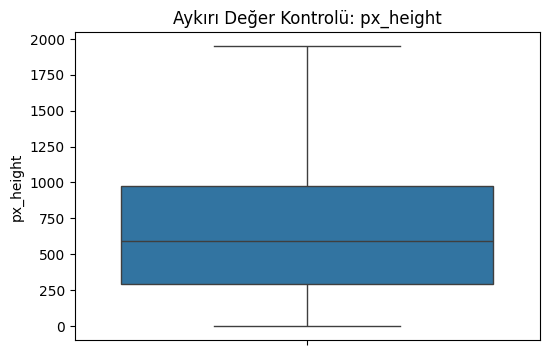

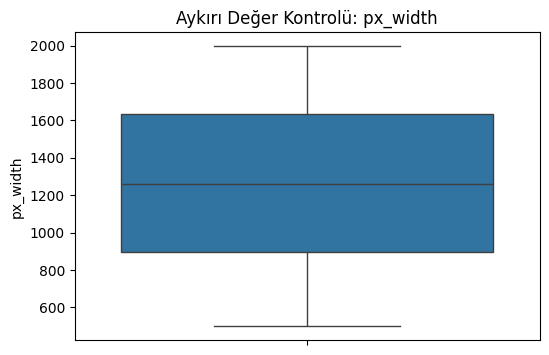

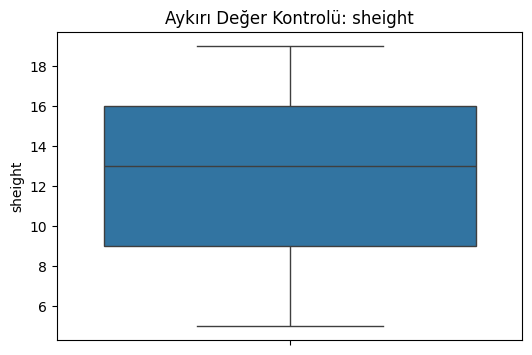

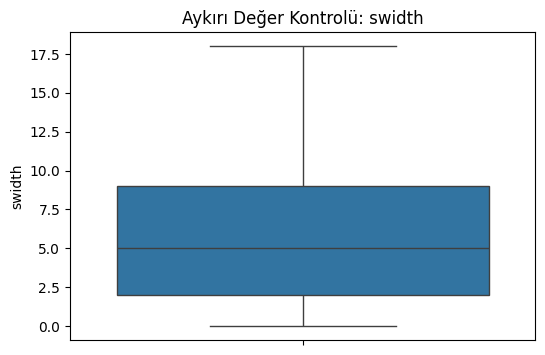

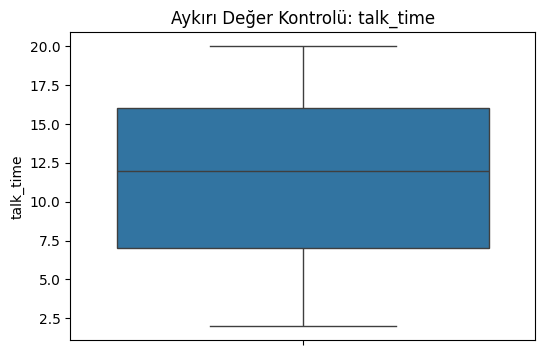

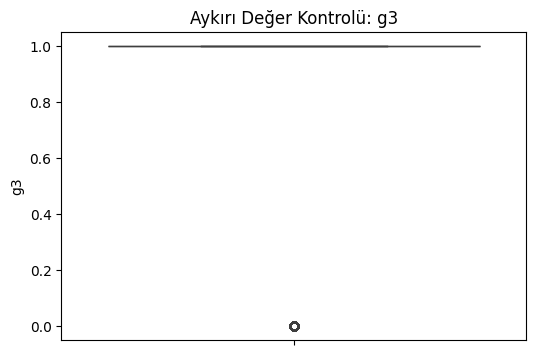

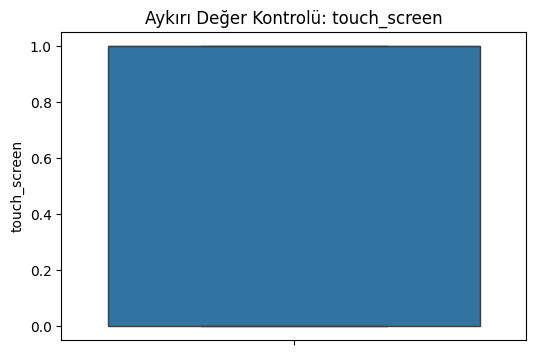

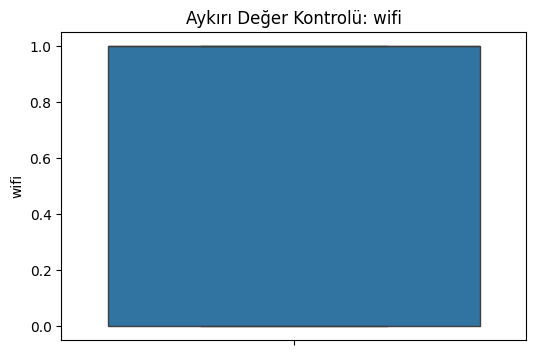

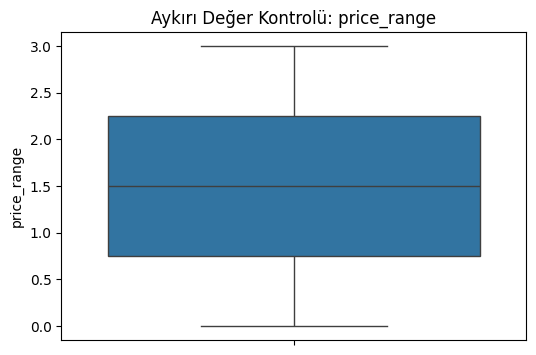

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[col])
    plt.title(f"Aykırı Değer Kontrolü: {col}")
    plt.show()


In [45]:
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [48]:
# Ayrıklaştırma (Örnek: `talk_time` için kategorik hale getirme)
# Uzun, orta ve kısa konuşma süreleri olarak sınıflandırma
data = pd.read_csv('train_odev.csv')
data['talk_time_cat'] = pd.cut(data['talk_time'], bins=[0, 5, 15, 30], labels=['short', 'medium', 'long'])

# İkilileştirme (Örnek: `blue` ve `wifi` değişkenleri zaten ikili durumda, işlem gerekmiyor)
# Ancak yeni bir sütun için dummy değişken oluşturma örneği
# data = pd.get_dummies(data, columns=['some_categorical_column'], drop_first=True)

In [49]:
# Düzleştirme (Ölçeklendirme - MinMaxScaler örneği)
data = pd.read_csv('train_odev.csv')
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


In [50]:
# Ön-işleme sonrası veri boyutu ve ilk 5 satır
data = pd.read_csv('train_odev.csv')
print("Ön-işleme sonrası veri boyutu:", data.shape)
print(data.head())

Ön-işleme sonrası veri boyutu: (1200, 20)
   battery  blue  speed  dual_sim  fcamera  g4  memory  pdepth  pweight  \
0      842     0    2.2         0        1   0       7     0.6      188   
1     1021     1    0.5         1        0   1      53     0.7      136   
2      563     1    0.5         1        2   1      41     0.9      145   
3      615     1    2.5         0        0   0      10     0.8      131   
4     1821     1    1.2         0       13   1      44     0.6      141   

   cores  pcamera  px_height  px_width  sheight  swidth  talk_time  g3  \
0      2        2         20       756        9       7         19   0   
1      3        6        905      1988       17       3          7   1   
2      5        6       1263      1716       11       2          9   1   
3      6        9       1216      1786       16       8         11   1   
4      2       14       1208      1212        8       2         15   1   

   touch_screen  wifi  price_range  
0             0     1    

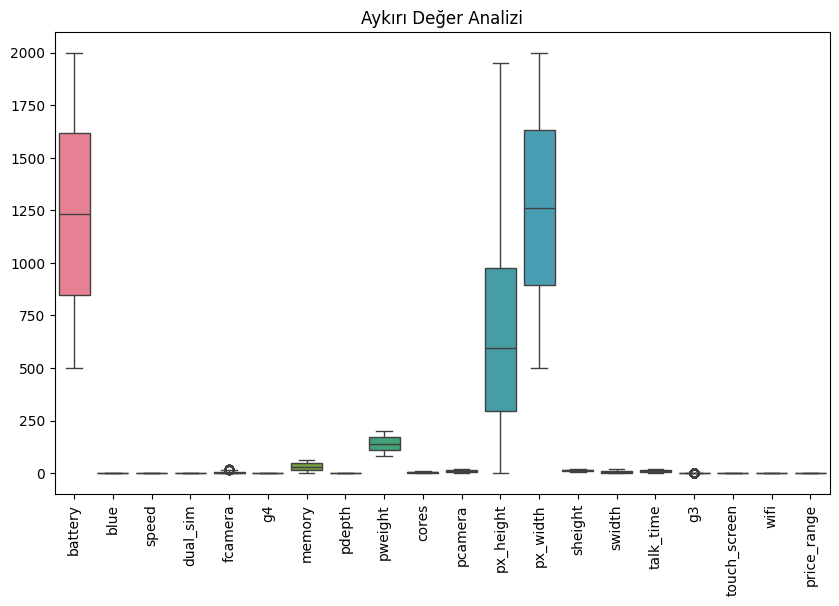

In [51]:
# Aykırı değer analizi için bir kutu grafiği
data = pd.read_csv('train_odev.csv')
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Aykırı Değer Analizi')
plt.show()

In [52]:
# Bağımsız ve bağımlı değişkenleri ayırma
X = data.drop("price_range", axis=1)  # Bağımsız değişkenler
y = data["price_range"]               # Bağımlı değişken

# X ve y boyutlarını kontrol etme
print("\nBağımsız değişkenlerin boyutu:", X.shape)
print("Bağımlı değişkenin boyutu:", y.shape)



Bağımsız değişkenlerin boyutu: (1200, 19)
Bağımlı değişkenin boyutu: (1200,)


In [53]:
from sklearn.model_selection import train_test_split

# Eğitim ve test veri setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ayrılmış veri setlerinin boyutları
print("\nEğitim veri seti boyutları:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("\nTest veri seti boyutları:")
print("X_test:", X_test.shape, "y_test:", y_test.shape)



Eğitim veri seti boyutları:
X_train: (960, 19) y_train: (960,)

Test veri seti boyutları:
X_test: (240, 19) y_test: (240,)


In [54]:
from sklearn.ensemble import RandomForestClassifier

# Model oluşturma
model = RandomForestClassifier(random_state=42, n_estimators=100)

# Modeli eğitme
model.fit(X_train, y_train)

print("\nModel başarıyla eğitildi!")



Model başarıyla eğitildi!


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Test veri setinde tahmin yapma
y_pred = model.predict(X_test)

# Performans metrikleri
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")

print("\nModel Performansı:")
print(f"Doğruluk (Accuracy): {accuracy:.2f}")
print(f"Hassasiyet (Precision): {precision:.2f}")
print(f"Duyarlılık (Recall): {recall:.2f}")

# Karmaşıklık Matrisi
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nKarmaşıklık Matrisi (Confusion Matrix):\n", conf_matrix)

# Sınıflandırma raporu
print("\nSınıflandırma Raporu (Classification Report):\n", classification_report(y_test, y_pred))



Model Performansı:
Doğruluk (Accuracy): 0.27
Hassasiyet (Precision): 0.26
Duyarlılık (Recall): 0.27

Karmaşıklık Matrisi (Confusion Matrix):
 [[26 11 13  7]
 [14  7 13 21]
 [20 11 14 14]
 [18 20 14 17]]

Sınıflandırma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.33      0.46      0.39        57
           1       0.14      0.13      0.13        55
           2       0.26      0.24      0.25        59
           3       0.29      0.25      0.27        69

    accuracy                           0.27       240
   macro avg       0.26      0.27      0.26       240
weighted avg       0.26      0.27      0.26       240



In [56]:
# Özellik önemlerini alma
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by="Importance", ascending=False)

print("\nÖzelliklerin Önemi:")
print(feature_importance)



Özelliklerin Önemi:
         Feature  Importance
0        battery    0.097158
11     px_height    0.091092
12      px_width    0.088720
8        pweight    0.081636
6         memory    0.076632
10       pcamera    0.068847
15     talk_time    0.064973
2          speed    0.063348
13       sheight    0.060845
14        swidth    0.059517
4        fcamera    0.054759
7         pdepth    0.050799
9          cores    0.048867
17  touch_screen    0.017453
18          wifi    0.016999
1           blue    0.015789
3       dual_sim    0.014583
5             g4    0.014149
16            g3    0.013834


In [57]:
import joblib

# Modeli kaydetme
joblib.dump(model, "price_range_model.pkl")
print("\nModel 'price_range_model.pkl' olarak kaydedildi!")



Model 'price_range_model.pkl' olarak kaydedildi!
